In [2]:
import numpy as np
x = np.array([1, 2, 3], dtype=float)

eps = np.finfo(x.dtype).eps # eps = 2.220446049250313e-16 type = <class 'numpy.float64'>

print(eps, type(eps))

2.220446049250313e-16 <class 'numpy.float64'>


In [10]:
if 0:
    print(123)

In [3]:
x = np.array([1, 2, 3], dtype=float)
x

array([1., 2., 3.])

In [6]:
eps = np.finfo(np.float32)
print(eps)

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



In [9]:
import torch
torch.tensor(0)

tensor(0)

In [3]:
# import os

# os.environ['CUDA_VISIBLE_DEVICES'] = '0'

# import sys
# import random
# from tqdm import tqdm
# import datetime
# import json
# import math
# import torch
# import torch.optim as optim
# from sklearn.metrics import roc_auc_score
# import argparse
# from recommendersystem.recsys import recsys
# from utils.LogPrint import Logger
# from utils.build_train_rec_data_loader_new import *
# from utils.build_test_rec_data_loader_new import *
# from utils.global_variable import *
# from utils import user_att_count
# from utils import user_att_count_yelp
# from utils import utils
# from utils.config_yelp import ConfigYelp
# from utils.config_last_fm import ConfigLastFM
# from utils.config_last_fm_star import ConfigLastFMStar
# from utils.config_yelp_star import ConfigYelpStar


# use_gpu = True
# config = None
# rec = None

# train_info_path = None

# item_optimizer = None
# att_att_optimizer = None
# item_att_optimizer = None
# test_info = None
# add_neg_item_num_max = 100


# def train_one_epoch(epoch_num):
#     rec.init_train()
#     train_loader = build_item_att_loader(config.name, train_info_path, config.user_info, config.item_info, config.att_tree_dict, \
#                                          config.att_num, config.item_num, epoch_num,
#                                          use_gpu=use_gpu, batch_size=config.batch_size, shuffle=config.train_shuffle,
#                                          num_threads=config.num_threads)
#     epoch_item_loss_sum = 0.
#     epoch_att_att_loss_sum = 0.
#     epoch_item_att_loss_sum = 0.
#     epoch_count = 0
#     for batch_data in tqdm(train_loader, ncols=0):
#         user_list, pos_item_list, \
#         item_pos_att_list, item_pos_att_mask, item_neg_att_list, item_neg_att_mask, \
#         neg_item_list1, neg_item_mask1, neg_item_list2, neg_item_mask2, \
#         att_pos_att_list, att_pos_att_mask, att_neg_att_list, att_neg_att_mask, att_pos_train_list, att_neg_train_list, \
#         att_list, pos_list, neg_list, item_neg_item_list, item_neg_item_list_mask = batch_data

#         if use_gpu:
#             user_list = user_list.cuda()
#             pos_item_list = pos_item_list.cuda()
#             item_pos_att_list = item_pos_att_list.cuda()
#             item_pos_att_mask = item_pos_att_mask.cuda()
#             item_neg_att_list = item_neg_att_list.cuda()
#             item_neg_att_mask = item_neg_att_mask.cuda()
#             neg_item_list1 = neg_item_list1.cuda()
#             neg_item_mask1 = neg_item_mask1.cuda()
#             neg_item_list2 = neg_item_list2.cuda()
#             neg_item_mask2 = neg_item_mask2.cuda()

#             att_pos_att_list = att_pos_att_list.cuda()
#             att_pos_att_mask = att_pos_att_mask.cuda()
#             att_neg_att_list = att_neg_att_list.cuda()
#             att_neg_att_mask = att_neg_att_mask.cuda()
#             att_pos_train_list = att_pos_train_list.cuda()
#             att_neg_train_list = att_neg_train_list.cuda()

#             att_list = att_list.cuda()
#             pos_list = pos_list.cuda()
#             neg_list = neg_list.cuda()

#             item_neg_item_list = item_neg_item_list.cuda()
#             item_neg_item_list_mask = item_neg_item_list_mask.cuda()

#         item_att_loss = 0.5 * rec.att_item_one_step_train(config.adj_index, att_list, pos_list, neg_list)
#         item_att_loss_float = item_att_loss.cpu().detach().item()
#         epoch_item_att_loss_sum += item_att_loss_float

#         item_loss = rec.item_one_step_train(user_list, config.adj_index,
#                                             item_pos_att_list, item_pos_att_mask,
#                                             item_neg_att_list, item_neg_att_mask,
#                                             pos_item_list, neg_item_list1, neg_item_mask1,
#                                             neg_item_list2, neg_item_mask2, item_neg_item_list, item_neg_item_list_mask)
#         item_loss_float = item_loss.cpu().detach().item()
#         epoch_item_loss_sum += item_loss_float

#         att_att_loss = rec.att_one_step_train(user_list, config.adj_index,
#                                             att_pos_att_list, att_pos_att_mask,
#                                               att_neg_att_list, att_neg_att_mask,
#                                               att_pos_train_list, att_neg_train_list)
#         att_att_loss_float = att_att_loss.cpu().detach().item()
#         epoch_att_att_loss_sum += att_att_loss_float

#         all_loss = item_att_loss + item_loss + att_att_loss
#         item_att_optimizer.zero_grad()
#         all_loss.backward()
#         item_att_optimizer.step()

#         epoch_count += 1
#         print("{} step item_loss: {} att_att loss: {} item_att_loss: {}".format(str(epoch_count), str(item_loss_float),
#               str(att_att_loss_float), str(item_att_loss_float)))

#     time_str = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#     epoch_item_loss = epoch_item_loss_sum / epoch_count
#     epoch_att_att_loss = epoch_att_att_loss_sum / epoch_count
#     epoch_item_att_loss = epoch_item_att_loss_sum / epoch_count
#     print("{} train att epoch {} att_att loss: {} item_loss {} item_att_loss {}".format(time_str, str(epoch_num), str(epoch_item_loss),
#            str(epoch_att_att_loss), str(epoch_item_att_loss)))
#     return epoch_item_loss, epoch_att_att_loss, epoch_item_att_loss


# def rec_test(test_model_path=None):
#     if test_model_path is not None:
#         if use_gpu:
#             rec.rec.load_state_dict(torch.load(test_model_path))
#         else:
#             rec.rec.load_state_dict(torch.load(test_model_path, map_location='cpu'))
#     rec.init_eval(config.adj_index)

#     test_batch_size = 512
#     test_shuffle = False
#     test_num_threads = 2

#     item_auc_list = []
#     att_auc_list = []
#     global_item_auc_list = []
#     item_att_auc_list = []

#     test_loader = build_test_item_att_loader(config.name, test_info, config.user_info, config.item_info, config.att_tree_dict,
#                                              config.att_num, config.item_num, use_gpu=use_gpu,
#                                              batch_size=test_batch_size, shuffle=test_shuffle,
#                                              num_threads=test_num_threads)
#     for batch_data in tqdm(test_loader, ncols=0):
#         user_list, item_list, pos_att_list, pos_att_mask, neg_att_list, neg_att_mask, \
#         test_item_list, test_item_mask, test_item_len, test_item_label, \
#         test_attribute_list, test_attribute_mask, test_attribute_len, test_attribute_label, \
#         global_test_item_list, global_test_item_mask, global_test_item_len, global_test_item_label, \
#         all_att, all_att_label = batch_data

#         if use_gpu:
#             user_list = user_list.cuda()
#             item_list = item_list.cuda()
#             pos_att_list = pos_att_list.cuda()
#             pos_att_mask = pos_att_mask.cuda()
#             neg_att_list = neg_att_list.cuda()
#             neg_att_mask = neg_att_mask.cuda()
#             test_item_list = test_item_list.cuda()
#             test_item_mask = test_item_mask.cuda()
#             test_attribute_list = test_attribute_list.cuda()
#             test_attribute_mask = test_attribute_mask.cuda()
#             global_test_item_list = global_test_item_list.cuda()
#             global_test_item_mask = global_test_item_mask.cuda()
#             all_att = all_att.cuda()
#             all_att_label = all_att_label.cuda()

#         item_score = rec.rec.get_item_list_score(user_list, pos_att_list, pos_att_mask, neg_att_list, neg_att_mask,
#                                                              test_item_list)
#         item_score = item_score.masked_fill(test_item_mask == False, 0.)
#         attribute_score = rec.rec.get_att_list_score(user_list, pos_att_list, pos_att_mask, neg_att_list, neg_att_mask, test_attribute_list)
#         attribute_score_list = attribute_score.masked_fill(test_attribute_mask == False, -1e9)
#         global_item_score = rec.rec.get_item_list_score(user_list, pos_att_list, pos_att_mask, neg_att_list,
#                                                                     neg_att_mask, global_test_item_list)
#         global_item_score = global_item_score.masked_fill(global_test_item_mask == False, 0.)
#         item_all_att_score = rec.rec.get_item_all_att_score(item_list, all_att)

#         item_score_list = item_score.cpu().detach().numpy()
#         attribute_score_list = attribute_score_list.cpu().detach().numpy()
#         global_item_score_list = global_item_score.cpu().detach().numpy()
#         item_all_att_score = item_all_att_score.cpu().detach().numpy()
#         all_att_label = all_att_label.cpu().detach().numpy()

#         for each_item_score, item_len, item_label in zip(item_score_list, test_item_len, test_item_label):
#             each_item_score_ = each_item_score[:item_len]
#             if len(set(item_label)) == 2:
#                 auc = roc_auc_score(item_label, each_item_score_)
#                 item_auc_list.append(auc)

#         for each_att_score, att_len, att_label in zip(attribute_score_list, test_attribute_len, test_attribute_label):
#             if sum(att_label) == 0:
#                 continue
#             each_att_score_ = each_att_score[:att_len]
#             auc = roc_auc_score(att_label, each_att_score_)
#             att_auc_list.append(auc)

#         for each_item_score, item_len, item_label in zip(global_item_score_list, global_test_item_len,
#                                                          global_test_item_label):
#             each_item_score_ = each_item_score[:item_len]
#             if len(set(item_label)) == 2:
#                 auc = roc_auc_score(item_label, each_item_score_)
#                 global_item_auc_list.append(auc)

#         for each_item_score, item_label in zip(item_all_att_score, all_att_label):
#             auc = roc_auc_score(item_label, each_item_score)
#             item_att_auc_list.append(auc)

#     mean_item_auc = np.mean(np.array(item_auc_list))
#     mean_global_item_auc = np.mean(np.array(global_item_auc_list))
#     mean_item_att_auc = np.mean(np.array(item_att_auc_list))

#     print("---------test-----------")
#     print("item_auc: {}, global item_auc: {}, item_att_auc: {}".format(str(mean_item_auc),
#                                                                         str(mean_global_item_auc),
#                                                                        str(mean_item_att_auc)))
#     return mean_item_auc, mean_global_item_auc, mean_item_att_auc


# def main():
#     global config
#     global rec
#     global train_info_path
#     global item_optimizer
#     global att_att_optimizer
#     global item_att_optimizer
#     global test_info

#     parser = argparse.ArgumentParser()
#     parser.add_argument('--data_name', type=str, default=LAST_FM, choices=[LAST_FM, LAST_FM_STAR, YELP, YELP_STAR],
#                         help='One of {lastfm, lastfm_star, yelp, yelp_star}.')
#     # args = parser.parse_args()
#     args = parser.parse_args(args=[])

#     if args.data_name == LAST_FM:
#         config = ConfigLastFM()
#         user_att_count.set_config(config)
#     elif args.data_name == YELP:
#         config = ConfigYelp()
#         user_att_count_yelp.set_config(config)
#     elif args.data_name == LAST_FM_STAR:
#         config = ConfigLastFMStar()
#         user_att_count.set_config(config)
#     elif args.data_name == YELP_STAR:
#         config = ConfigYelpStar()
#         user_att_count.set_config(config)

#     rec = recsys(config, use_gpu=use_gpu)

#     data_name = args.data_name
#     if data_name == YELP_STAR:
#         data_name = YELP

#     train_info_path = "./data/" + data_name + '/' + FM_SAMPLE_DATA + '/sample_fm_data_train-'

#     test_info_path = "./data/" + data_name + '/' + FM_SAMPLE_DATA + "/sample_fm_data_valid.pkl"
#     test_info = utils.load_pickle(test_info_path)

#     date_str = datetime.date.today().isoformat()
#     sys.stdout = Logger("offline-train-rec-{}-ilr-{}-alr-{}-reg-{}-bs-{}-{}.log" \
#                         .format(date_str, str(config.item_lr), str(config.att_lr), str(config.weight_decay),
#                                 str(config.batch_size),
#                                 rec.model_info_str))

#     item_optimizer = optim.Adam([param for param in rec.rec.parameters() if param.requires_grad == True], \
#                                 lr=config.item_lr, weight_decay=config.weight_decay)
#     att_att_optimizer = optim.Adam([param for param in rec.rec.parameters() if param.requires_grad == True], \
#                                lr=config.att_lr, weight_decay=config.weight_decay)
#     item_att_optimizer = optim.Adam([param for param in rec.rec.parameters() if param.requires_grad == True], \
#                                     lr=config.att_lr, weight_decay=config.weight_decay)

#     for _ in range(config.epoch_num):
#         train_one_epoch(_)
#         rec.save_model("iter{}-{}".format(str(_), date_str))
#         if (_ + 1) % config.test_epoch_num == 0:
#             with torch.no_grad():
#                 rec_test()

# if __name__ == '__main__':
#     main()


In [ ]:
import torch
print('cuda.is_available: ',torch.cuda.is_available())
print('Device name: ',torch.cuda.get_device_name(1))
device = torch.device("cuda:0") #選擇要用哪張GPU跑|

In [2]:
import torch
torch.cuda.close()

/home/victor/.conda/envs/recommender/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'torch.cuda' has no attribute 'close'

In [ ]:
%tb

In [ ]:
import math
import os

from utils.utils import set_random_seed

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import argparse
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import json
import random
import pickle
import datetime
import numpy as np
from tqdm import tqdm
from utils.LogPrint import Logger
from convhis.ConvHis import ConvHis
from convhis.ConvHisConfig import ConvHisConfig
from agents.AgentRule import AgentRule
from agents.AgentRuleConfig import AgentRuleConfig
from agents.AgentEAR import AgentEAR
from agents.AgentEARConfig import AgentEARConfig
from recommendersystem.recsys import recsys
from user.UserSim import UserSim
from user.UserSimConfig import UserSimConfig
from dialoguemanager.DialogueManager import DialogueManager
from dialoguemanager.DialogueManagerConfig import DialogueManagerConfig
from utils.global_variable import *
from utils.config_yelp import ConfigYelp
from utils.config_last_fm import ConfigLastFM
from utils.config_last_fm_star import ConfigLastFMStar
from utils.config_yelp_star import ConfigYelpStar
from utils import user_att_count
from utils import user_att_count_not_subset
from utils import user_att_count_yelp
from utils import utils
from utils.global_variable import *

eps = np.finfo(np.float32).eps.item()
config = None


def agent_eval(agent, load_model_type, dm):
    use_gpu = True
    env = dm
    data_name = args.data_name
    if data_name == YELP_STAR:
        data_name = YELP

    PG_test_data_path = "./data/" + data_name + '/' + UI_INTERACTION_DATA + '/review_dict_test.json'

    with open(PG_test_data_path, "rb") as f:
        PG_test_data_list = json.load(f)

    ui_test_list = []
    for user_str, items in PG_test_data_list.items():
        user_id = int(user_str)
        for item_id in items:
            ui_test_list.append([user_id, item_id])
    ui_test_array = np.array(ui_test_list)
    np.random.shuffle(ui_test_array)

    test_size = 4000
    if args.data_name in [LAST_FM_STAR, LAST_FM]:
        test_size = 4000  # Only do 4000 iteration for the sake of time
    if args.data_name in [YELP_STAR, YELP]:
        test_size = 2500  # Only do 2500 iteration for the sake of time

    agent.set_env(env)
    if load_model_type == "PG":
        print("load PG model ...")
        agent.load_model()
    else:
        print("no pretrian model...")

    sum_reward = 0.
    sum_turn = 0
    sum_success = 0
    episode_num = 0
    SR_turn_15 = [0] * 15
    Rank = 0
    for e_data in tqdm(random.sample(ui_test_list, test_size), ncols=0):
        # user = ui_test_array[episode_num, 0]
        user = e_data[0]
        # item = ui_test_array[episode_num, 1]
        item = e_data[1]
        reward, turn, success, state_list = agent.PG_eva_one_episode(user, item)
        if 4 >= turn >= 2:
            contain_rec_feed = False
            contain_ask_suc = False
            for state in state_list:
                if state[0] == '4':
                    contain_rec_feed = True
                if state[0] == '1':
                    contain_ask_suc = True
            if state_list[-1][0] == '2' and contain_rec_feed:
                print("get one")
                print(e_data[0], e_data[1])
                print(len(state_list))
                print(state_list)
                if turn <= 3:
                    print("get better one")
                    print(e_data[0], e_data[1])
                    print(len(state_list))
                    print(state_list)
        episode_num += 1
        sum_reward += reward
        sum_turn += turn
        sum_success += success

        if success:
            t = turn - 1
            SR_turn_15 = [v + 1 if i > t else v for i, v in enumerate(SR_turn_15)]
            Rank += (1 / math.log(t + 3, 2) + (1 / math.log(t + 2, 2) - 1 / math.log(t + 3, 2)) / math.log(True + 1, 2))

    average_reward = float(sum_reward) / episode_num
    average_turn = float(sum_turn) / episode_num
    success_rate = float(sum_success) / episode_num
    SR_TURN = [i / test_size for i in SR_turn_15]
    print(SR_TURN)
    print(Rank / test_size)

    time_str = datetime.datetime.now().isoformat()
    print("{}: average_reward {:g}, average_turn {:g}, success_rate {:g}"\
            .format(time_str, average_reward, average_turn, success_rate))

parser = argparse.ArgumentParser(description='train ear agent')
parser.add_argument('--mode', type=str,
                    help='choose from pretrain or PG')
parser.add_argument('--data_name', type=str, default=LAST_FM, choices=[LAST_FM, LAST_FM_STAR, YELP, YELP_STAR],
                    help='One of {lastfm, lastfm_star, yelp, yelp_star}.')
# args = parser.parse_args()
args = parser.parse_args(args=[])

if args.data_name == LAST_FM:
    config = ConfigLastFM()
    user_att_count_not_subset.set_config(config)
    model_name = "iter299-2022-09-01" # lastfm
elif args.data_name == YELP:
    config = ConfigYelp()
    user_att_count_not_subset.set_config(config)
    model_name = "iter800-2022-09-06" # yelp 2loss
elif args.data_name == LAST_FM_STAR:
    config = ConfigLastFMStar()
    user_att_count_not_subset.set_config(config)
    model_name = "iter4260-2022-09-01" # lastfm_star
elif args.data_name == YELP_STAR:
    config = ConfigYelpStar()
    user_att_count_not_subset.set_config(config)
    model_name = "iter800-2022-09-03" # yelp* 3loss equal

ch = ConvHis(ConvHisConfig(config))
agent = AgentEAR(AgentEARConfig(config), ch)
rec = recsys(config, convhis=ch)
ch.set_rec(rec)
rec.load_model(model_name, False)
rec.init_eval(config.adj_index)
usersim = UserSim(UserSimConfig(config))
dm = DialogueManager(DialogueManagerConfig(config), rec, agent, usersim, ch)
set_random_seed(1)
agent_eval(agent, "PG", dm)


In [150]:
f= open("./data/" + 'lastfm' + '/Graph_generate_data' + "/user_item.json")
content = json.load(f)
# content

In [155]:
# pop_item_list = []
# unpop_item_list = []
# for i in range(len(content)):
#     if 2 in content[str(i)]['feature_index'] or 10 in content[str(i)]['feature_index']:
#         # print(content[str(i)]['feature_index'])
#         pop_item_list.append(i)
#     if 23 in content[str(i)]['feature_index'] or 12 in content[str(i)]['feature_index'] \
#     or 16 in content[str(i)]['feature_index'] or 6 in content[str(i)]['feature_index']  \
#     or 18 in content[str(i)]['feature_index'] or 11 in content[str(i)]['feature_index'] \
#     or 25 in content[str(i)]['feature_index'] or 14 in content[str(i)]['feature_index'] \
#     or 8 in content[str(i)]['feature_index'] or 7 in content[str(i)]['feature_index'] \
#     or 29 in content[str(i)]['feature_index'] or 27 in content[str(i)]['feature_index'] \
#     or 32 in content[str(i)]['feature_index'] or 31 in content[str(i)]['feature_index'] \
#     or 30 in content[str(i)]['feature_index'] :
#         unpop_item_list.append(i)

# same_list = list(set(pop_item_list)&set(unpop_item_list))
# for num in same_list:
#     if num in pop_item_list:
#         pop_item_list.remove(num)
#     if num in unpop_item_list:
#         unpop_item_list.remove(num)
        
# print(len(pop_item_list))
# print(len(unpop_item_list))
# # 23 12 16 6 18 11 25 14 8 7 29 27 32 31 30

In [156]:
# same_list = list(set(pop_item_list)&set(unpop_item_list))
# len(same_list)

In [137]:
for num in same_list:
    if num in pop_item_list:
        pop_item_list.remove(num)
    if num in unpop_item_list:
        unpop_item_list.remove(num)

In [138]:
print(len(pop_item_list))
print(len(unpop_item_list))

2661
1471


In [151]:
# content[str(0)]

In [162]:
item_list = []
for i in range(len(content)):
    item = content[str(i)]
    item_list.append(item)

In [164]:
from itertools import chain
item_list = list(chain.from_iterable(item_list))
len(item_list)

76693

In [183]:
import pandas as pd
df = pd.DataFrame(data={'item':item_list})
df

,item
0,49
1,50
2,51
3,52
4,53
...,...
76688,6200
76689,6342
76690,6624
76691,7070


In [212]:
len(item_list)

76693

In [202]:
df_pop = pd.DataFrame()

In [203]:
df_pop.index = (df.item.value_counts() / len(df)).index
df_pop['percentage'] = df.item.value_counts() / len(df)
df_pop

,percentage
7091,0.007889
5249,0.006767
5250,0.006259
3965,0.006220
4819,0.006128
...,...
6912,0.000013
4381,0.000013
1277,0.000013
1504,0.000013


In [206]:
df_pop.index[1]

5249

In [209]:
count = 0
pop_list = []
unpop_list = []
for i in range(len(df_pop)):
    count += float(df_pop.iloc[i])
    if count <= 0.2:
        pop_list.append(df_pop.index[i])
    if count >= 0.8:
        unpop_list.append(df_pop.index[i])
print(count)

1.0000000000001117


In [213]:
len(pop_list)

53

In [214]:
len(unpop_list)

5683

In [215]:
print(len(set(pop_list)&set(unpop_list)))

0


In [55]:
# item_list.sort()

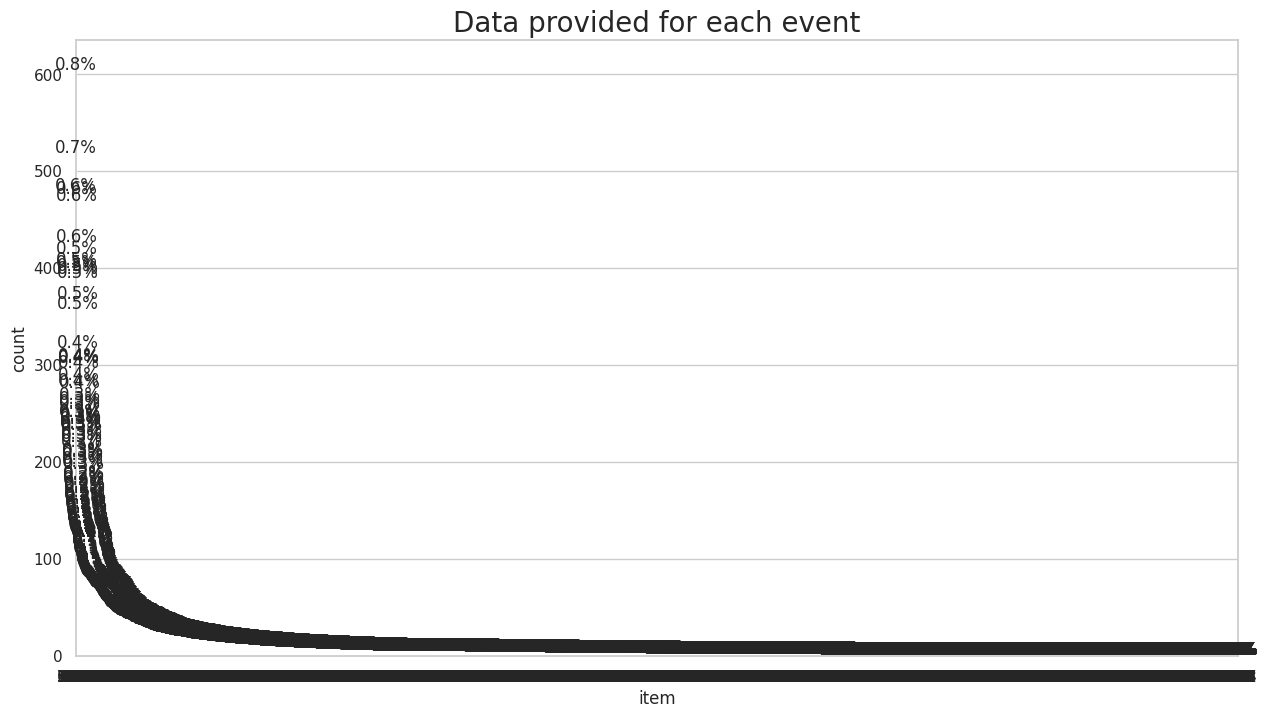

In [149]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
total = float(len(df))
ax = sns.countplot(x=df["item"], order = df["item"].value_counts().index)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [113]:
0.7+0.9+0.9+0.9+1.1+1.2+1.2+1.3+1.3+1.4+1.6+1.7+1.7+1.9+1.9
23 12 16 6 18 11 25 14 8 7 29 27 32 31 30

19.7

<AxesSubplot:xlabel='category', ylabel='count'>

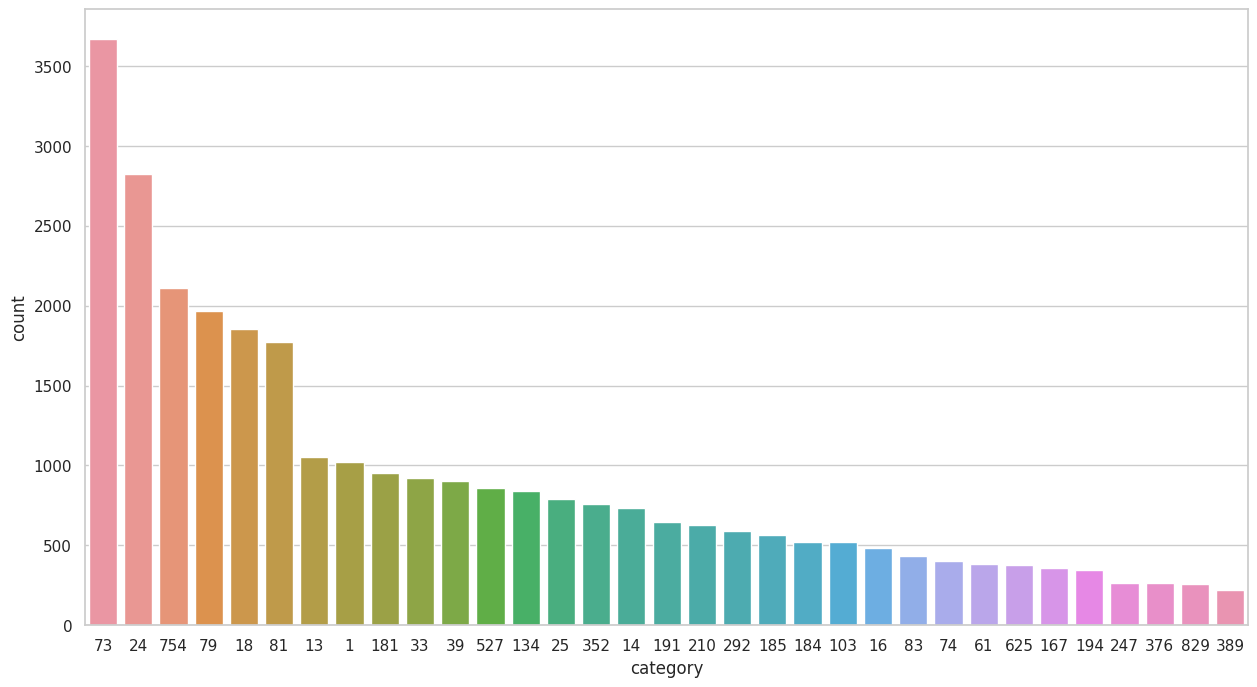

In [75]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.countplot(x=df["category"], order = df["category"].value_counts().index)

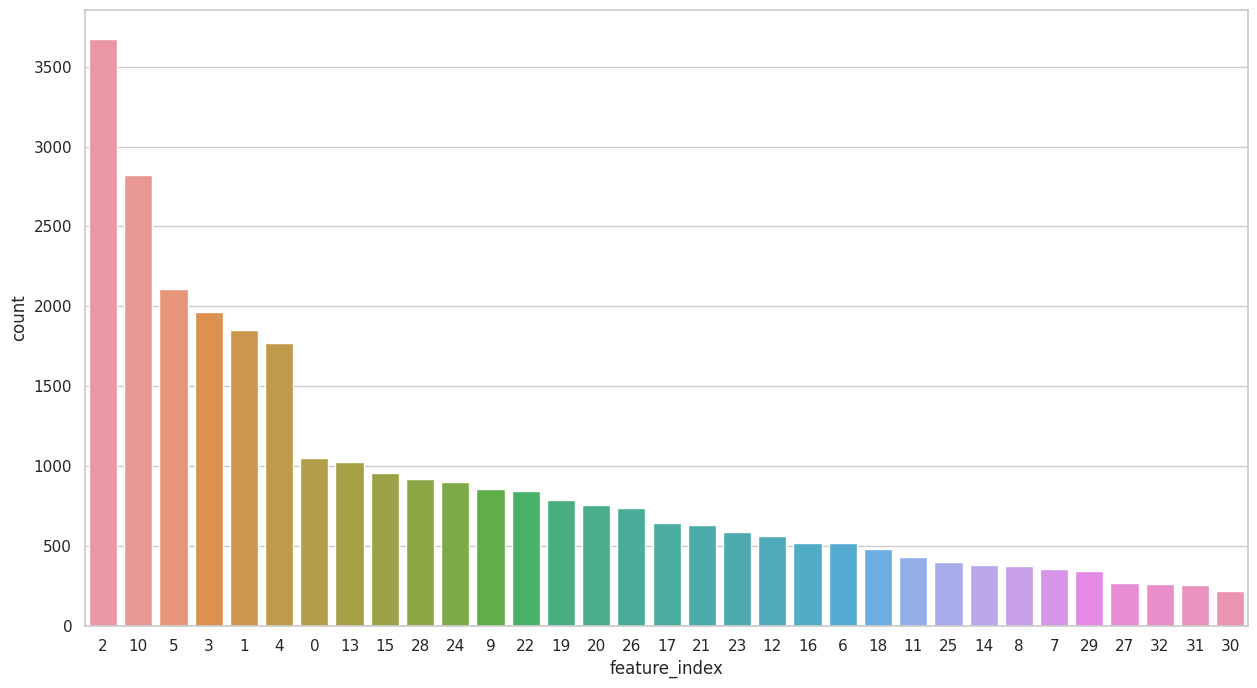

In [85]:
plt.figure(figsize=(15,8))
sns.set_theme(style="whitegrid")
sns.countplot(x=df["feature_index"], order = df["feature_index"].value_counts().index)

In [ ]:
with_hue(result, )

In [83]:
df["feature_index"].value_counts()

2     3671
10    2825
5     2111
3     1966
1     1855
4     1770
0     1054
13    1024
15     955
28     921
24     903
9      856
22     842
19     791
20     760
26     736
17     647
21     630
23     589
12     562
16     521
6      519
18     482
11     431
25     399
14     383
8      377
7      357
29     343
27     266
32     265
31     259
30     220
Name: feature_index, dtype: int64

In [80]:
df.describe()

,category,feature_index
count,30290.000000,30290.000000
mean,164.385276,11.295708
std,214.576675,9.105945
min,1.000000,0.000000
25%,24.000000,3.000000
50%,79.000000,10.000000
75%,185.000000,19.000000
max,829.000000,32.000000


In [38]:
for i in range(0, 33):
    print(result_list.count(i))

1054
1855
3671
1966
1770
2111
519
357
377
856
2825
431
562
1024
383
955
521
647
482
791
760
630
842
589
903
399
736
266
921
343
220
259
265


In [17]:
import json
with open("./data/" + 'lastfm' + '/Graph_generate_data' + "/item_dict.json", "r") as f:
    user_info = json.load(f)
    for i in range()
    print(user_info)

{'0': {'categories': [73, 79], 'feature_index': [2, 3], 'busi_id': 11547}, '1': {'categories': [73, 81, 79], 'feature_index': [2, 4, 3], 'busi_id': 11548}, '2': {'categories': [73, 81, 754], 'feature_index': [2, 4, 5], 'busi_id': 11549}, '3': {'categories': [103, 754, 167, 625], 'feature_index': [6, 5, 7, 8], 'busi_id': 5988}, '4': {'categories': [83, 754], 'feature_index': [11, 5], 'busi_id': 15267}, '5': {'categories': [24, 73, 81, 79, 185], 'feature_index': [10, 2, 4, 3, 12], 'busi_id': 10613}, '6': {'categories': [73, 79, 61], 'feature_index': [2, 3, 14], 'busi_id': 6794}, '7': {'categories': [73, 754], 'feature_index': [2, 5], 'busi_id': 6795}, '8': {'categories': [181, 24, 73, 79], 'feature_index': [15, 10, 2, 3], 'busi_id': 6792}, '9': {'categories': [24, 73, 81, 83, 79, 754, 184, 191, 16, 25, 352], 'feature_index': [10, 2, 4, 11, 3, 5, 16, 17, 18, 19, 20], 'busi_id': 6790}, '10': {'categories': [73, 16], 'feature_index': [2, 18], 'busi_id': 6791}, '11': {'categories': [1, 73, 7